In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
## 1
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## 2
import sys
sys.path.append("/home/SharedData/anaconda2/external/fastai/")

In [3]:
# !pip install torchtext

In [3]:
from tqdm import tqdm
tqdm.monitor_interval = 0

In [4]:
# This file contains all the main external libs we'll use
## 3
from fastai.imports import *

In [5]:
## 4
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
## 5
PATH = "../data/"
sz=224
arch = resnext101_64
bs=64

In [7]:
## 6
torch.cuda.is_available()

True

In [8]:
## 7
torch.backends.cudnn.enabled

True

In [10]:
os.listdir(PATH)

['train_set1',
 'test_set',
 'models',
 'train_info.csv',
 'annot',
 'train2_info.csv',
 'sub',
 'val_info.csv',
 'class_list.txt',
 'test_info.csv',
 'tmp']

In [11]:
f'{PATH}train_set1'

'../data/train_set1'

In [12]:
files = os.listdir(f'{PATH}train_set1/')
files.sort()
files[-5:-1]

['val_010318.jpg', 'val_010319.jpg', 'val_010320.jpg', 'val_010321.jpg']

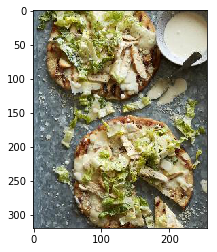

In [12]:
img = plt.imread(f'{PATH}train_set1/{files[4]}')
plt.imshow(img);

In [13]:
img.shape

(320, 256, 3)

In [14]:
img[:4,:4]

array([[[117, 137, 144],
        [110, 130, 137],
        [ 94, 114, 121],
        [ 90, 110, 119]],

       [[117, 140, 146],
        [111, 131, 140],
        [ 98, 118, 127],
        [ 96, 116, 125]],

       [[115, 138, 146],
        [108, 131, 139],
        [102, 122, 131],
        [100, 120, 129]],

       [[108, 130, 141],
        [106, 128, 139],
        [104, 124, 135],
        [ 99, 119, 130]]], dtype=uint8)

In [15]:
!ls ../data

annot		models	       test_set  train2_info.csv  train_set1
class_list.txt	test_info.csv  tmp	 train_info.csv   val_info.csv


In [9]:
## 8
train_label_csv = f'{PATH}train_info.csv'
train2_label_csv = f'{PATH}train2_info.csv'
valid_label_csv = f'{PATH}val_info.csv'
test_label_csv = f'{PATH}test_info.csv'


train_label_df = pd.read_csv(train_label_csv, header=None)
valid_label_df = pd.read_csv(valid_label_csv, header=None)
test_label_df = pd.read_csv(test_label_csv, header=None)
train2_label_df = pd.read_csv(train2_label_csv, header=None)

In [17]:
print(train2_label_df.tail())
print("Now Valid")
print(valid_label_df.tail())

                     0    1
112051  val_010318.jpg  172
112052  val_010319.jpg   72
112053  val_010320.jpg  124
112054  val_010321.jpg  109
112055  val_010322.jpg  168
Now Valid
                    0    1
10318  val_010318.jpg  172
10319  val_010319.jpg   72
10320  val_010320.jpg  124
10321  val_010321.jpg  109
10322  val_010322.jpg  168


In [14]:
train_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
162,34
164,292
103,302
153,313
209,321
159,322
15,327
99,329
174,333


In [15]:
valid_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
116,2
189,9
99,22
149,22
65,26
159,26
117,29
50,32
191,34


In [16]:
train2_label_df.pivot_table(index=1, aggfunc=len).sort_values(0, ascending=True)

,0
1,
162,83
164,330
103,344
159,348
99,351
209,362
153,370
174,376
15,384


In [21]:
len(train_label_df)

101733

In [10]:
val_idxs = np.arange(len(train_label_df), len(train2_label_df))
val_idxs

array([101733, 101734, 101735, ..., 112053, 112054, 112055])

In [23]:
!wc -l '{PATH}train2_info.csv'

112056 ../data/train2_info.csv


In [24]:
print(len(val_idxs))
print(len(valid_label_df))


10323
10323


In [11]:
## 9
val_idxs = np.arange(len(train_label_df), len(train2_label_df))
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train_set1', f'{PATH}train2_info.csv', test_name='test_set', val_idxs=val_idxs, tfms=tfms, bs=bs, skip_header=False)
    return data 

data = get_data(sz,bs)

In [12]:

fn = PATH + data.val_ds.fnames[-1]; fn

'../data/train_set1/val_010322.jpg'

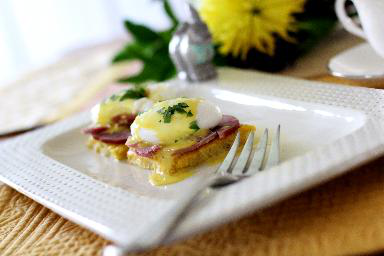

In [27]:
img = PIL.Image.open(fn); img


In [28]:
img.size


(384, 256)

In [29]:
len(data.trn_ds), len(data.test_ds)

(101733, 24088)

In [30]:
len(data.classes), data.classes[:7]

(211, ['0', '1', '10', '100', '101', '102', '103'])

In [ ]:
# !pip install torch==0.3.1

In [13]:
## 10
learn = ConvLearner.pretrained(arch,data, precompute=True, opt_fn=optim.Adam)

In [32]:
## 11
lrf=learn.lr_find()

 52%|█████▏    | 826/1590 [00:10<00:09, 81.13it/s, loss=3.56] 

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


 67%|██████▋   | 1073/1590 [00:12<00:05, 87.50it/s, loss=13.8]

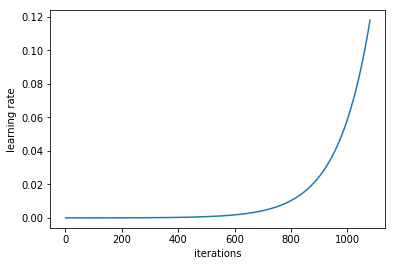

In [34]:
learn.sched.plot_lr()


 67%|██████▋   | 1073/1590 [00:30<00:14, 35.74it/s, loss=13.8]

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


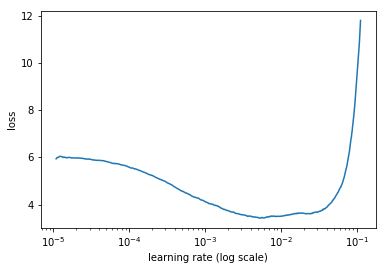

In [35]:
## 12
learn.sched.plot()

In [14]:
## 13
def accuracytop3(preds, targs):
    preds_3 = preds.sort(dim=1, descending=True)[1][:, :3]
    return ((preds_3[:, 0] == targs) + (preds_3[:, 1] == targs) + (preds_3[:, 2] == targs)).float().mean()
    

In [15]:
## 14
learn.fit(0.005, 3, cycle_len=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.64122    2.02212    0.51022    0.717911  
    1      2.411515   1.843068   0.54984    0.745617          
    2      2.464107   1.866182   0.539572   0.736511          
    3      2.218063   1.765483   0.567277   0.756563           
    4      2.368641   1.81335    0.556137   0.75017           
    5      2.147021   1.737226   0.573186   0.761407          



[array([1.73723]), 0.5731860893064606, 0.761406567811989]

In [16]:
## 15
learn.fit(0.001, 2, cycle_len=2, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      2.055959   1.674868   0.583358   0.770997  
    1      1.91435    1.698059   0.582679   0.768672          
    2      1.938405   1.677323   0.585101   0.773806          
    3      1.933923   1.664695   0.585779   0.77274           
    4      1.845834   1.639709   0.588976   0.774969          
    5      1.811491   1.631824   0.591204   0.774872          



[array([1.63182]), 0.5912041073244786, 0.774871645793196]

In [40]:
lrf=learn.lr_find()

 59%|█████▊    | 934/1590 [00:07<00:05, 124.64it/s, loss=3.63]

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


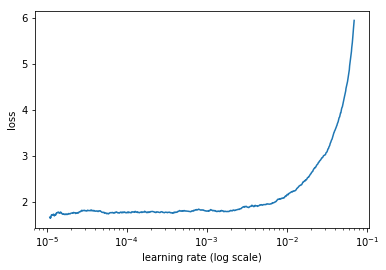

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [41]:
learn.sched.plot()


In [17]:
## 16_1
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3      
    0      1.909875   1.641255   0.585586   0.777681  
    1      1.837904   1.639679   0.58762    0.774969          
    2      1.734485   1.628884   0.589848   0.775647          
    3      1.713699   1.62951    0.591301   0.77865           



[array([1.62951]), 0.5913009783890917, 0.7786496173535208]

In [18]:
## 16_2
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

epoch      trn_loss   val_loss   accuracy   accuracytop3       
    0      1.805718   1.669715   0.585586   0.774     
    1      1.766532   1.636396   0.590042   0.775743          
    2      1.696463   1.613897   0.591398   0.779812          
    3      1.640284   1.634223   0.591398   0.7771            



[array([1.63422]), 0.5913978494537047, 0.7770996803601306]

In [19]:
# 16_3 Testing1
log_preds, y = learn.TTA(is_test=True)
probs = np.exp(log_preds)

In [22]:
#16_3_2 Testing2
probs_1 = np.mean(probs, axis=0)
probs_1.shape

(24088, 211)

In [25]:
#16_3_3 Testing3
sub_ds = pd.DataFrame(probs_1)
sub_ds.columns = data.classes
sub_ds.insert(0, 'id', [o[9:] for o in data.test_ds.fnames])
sub_ds.head()

,id,0,1,10,100,101,102,103,104,105,...,90,91,92,93,94,95,96,97,98,99
0,test_007350.jpg,4.146333e-07,1.978815e-07,6.500111e-06,2.588403e-06,0.000004,1.673968e-04,0.035036,3.889451e-05,6.647213e-07,...,0.000023,1.220477e-05,1.481471e-04,0.000003,1.572336e-07,1.515304e-05,1.798267e-06,3.615795e-09,1.354377e-05,6.001461e-07
1,test_002371.jpg,1.687718e-06,4.329611e-06,2.945113e-07,3.995941e-05,0.000005,1.489524e-05,0.000020,4.057375e-06,6.346622e-04,...,0.000265,4.347206e-05,1.916569e-05,0.000215,1.179059e-04,2.666743e-03,1.263602e-06,4.976774e-08,9.177227e-06,5.778560e-07
2,test_011109.jpg,1.181902e-04,8.196144e-05,3.127698e-05,2.319823e-05,0.000001,9.201749e-04,0.000046,1.120761e-04,6.258561e-05,...,0.042891,4.179105e-03,2.099222e-03,0.000230,1.723711e-03,1.850424e-05,4.064087e-02,2.255787e-03,2.428206e-03,4.266172e-04
3,test_013610.jpg,1.035941e-08,1.054500e-07,1.531043e-06,1.328058e-07,0.000005,3.504865e-08,0.000153,8.810797e-07,1.868634e-06,...,0.000003,3.528336e-07,9.491087e-07,0.000002,1.265851e-06,1.964478e-07,5.675873e-07,5.773346e-08,4.097206e-07,2.233159e-06
4,test_022100.jpg,4.815719e-05,4.261851e-04,2.074755e-04,1.696218e-04,0.000055,3.145180e-04,0.003036,1.361804e-02,1.283103e-05,...,0.002015,8.847730e-03,1.390447e-04,0.026780,9.336508e-06,1.157879e-03,3.210028e-06,1.139196e-03,3.200659e-04,9.416150e-04


In [64]:
sub_ds.iloc[0]

id     test_007350.jpg
0          4.14633e-07
1          1.97882e-07
10         6.50011e-06
100         2.5884e-06
101        3.73423e-06
102        0.000167397
103          0.0350365
104        3.88945e-05
105        6.64721e-07
106        6.22754e-05
107         3.2911e-05
108        6.40096e-05
109        2.64113e-07
11         6.09125e-06
110        4.00061e-07
111         1.2892e-07
112        1.71511e-05
113        1.42572e-06
114         0.00296323
115        5.04817e-06
116        3.58852e-05
117        0.000387646
118        3.35351e-06
119         2.4629e-06
12         1.94114e-06
120        1.71383e-07
121        1.51247e-05
122          0.0469722
123         1.7096e-06
            ...       
72         6.58119e-06
73         9.31972e-06
74            0.677904
75         3.83846e-05
76         8.48173e-07
77           0.0598035
78         1.58428e-07
79         4.57145e-07
8          8.23519e-07
80         5.60285e-06
81         2.01296e-06
82         5.70216e-06
83         

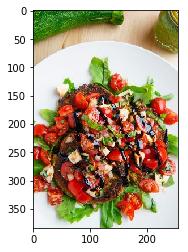

In [74]:
img_test = PIL.Image.open(f'{PATH}test_set/test_002371.jpg')
plt.imshow(img_test)

In [67]:
r1 = sub_ds.iloc[1]
r11 = np.array(r1[1:])
r12 = -r11
r2 = np.argsort(r12)
r3 = np.array(data.classes)[r2]
r3
r3[:3]
r1[r3[:3]]

150     0.595044
60       0.15525
82     0.0987843
Name: 1, dtype: object

In [ ]:
# 16_3_4 Testing4
SUBM = f'{PATH}sub/' 
os.makedirs(SUBM, exist_ok=True)
sub = 'id, predicted\n'
str_format = '{},{} {} {}\n'
ds_class_array = np.array(data.classes)
for i in range(len(sub_ds)):
    r1 = sub_ds.iloc[i]
    r11 = np.array(r1[1:])
    r12 = -r11
    r2 = np.argsort(r12)
    r3 = np.array(data.classes)[r2]
    pred_test_fin = r3[:3]
    sub += str_format.format(data.test_ds.fnames[i][9:], pred_test_fin[0], pred_test_fin[1], pred_test_fin[2])
# with open('sub1.csv', 'w') as f:
#     f.write(sub)

In [ ]:
# 16_3_5 Testing5
with open('sub1.csv', 'w') as f:
    f.write(sub)

In [ ]:
## Optional. Doesnt Help Much
learn.set_data(get_data(299,bs))

In [ ]:
learn.fit(0.001, 1, cycle_len=4, cycle_mult=2, metrics=[accuracy, accuracytop3])

In [44]:
## 17
import torch

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [45]:
pred_test = learn.predict(is_test=True)

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [ ]:
learn

In [108]:
log_preds = learn.predict(is_test=True)
probs = np.exp(log_preds)  

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [109]:
probs.shape

(24088, 211)

In [103]:
data.test_ds.fnames[0][9:]

'test_007350.jpg'

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [111]:
probs.shape

(24088, 211)

In [1]:
ds = pd.DataFrame(probs)
ds.columns = data.classes
ds.insert(0, 'id', [o[9:] for o in data.test_ds.fnames])

NameError: name 'pd' is not defined

In [114]:
ds.head()

,id,0,1,10,100,101,102,103,104,105,...,90,91,92,93,94,95,96,97,98,99
0,test_007350.jpg,8.257394e-07,0.000001,1.378909e-06,8.536839e-06,0.000008,2.753644e-04,0.057976,0.000043,7.074201e-07,...,0.000023,0.000048,0.000198,0.000004,8.404323e-07,0.000019,7.224164e-07,9.517435e-09,1.883745e-05,0.000003
1,test_002371.jpg,1.699701e-05,0.000001,6.267365e-07,2.334872e-05,0.000009,3.882266e-05,0.000032,0.000013,1.141820e-03,...,0.000280,0.000080,0.000029,0.000875,4.993047e-04,0.001099,1.814055e-06,2.452228e-08,2.056050e-05,0.000003
2,test_011109.jpg,1.361980e-04,0.000105,1.795087e-04,6.104214e-05,0.000003,7.107649e-04,0.000054,0.000052,3.104154e-05,...,0.081321,0.003447,0.000763,0.000087,1.032034e-04,0.000007,8.600924e-03,3.134420e-03,9.918975e-04,0.001369
3,test_013610.jpg,1.106999e-07,0.000002,6.327406e-06,8.630017e-08,0.000015,4.237994e-07,0.000155,0.000011,3.850968e-06,...,0.000006,0.000004,0.000004,0.000101,1.080636e-05,0.000004,1.467571e-06,1.126925e-06,9.205834e-07,0.000032
4,test_022100.jpg,4.964558e-06,0.000029,6.428989e-05,2.535579e-05,0.000039,5.478813e-04,0.003795,0.009454,6.386695e-05,...,0.000374,0.004381,0.000064,0.025982,2.230156e-04,0.000524,1.495113e-06,2.895586e-04,9.277763e-05,0.000198


/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [115]:
SUBM = f'{PATH}sub/' 
os.makedirs(SUBM, exist_ok=True) 
ds.to_csv(f'{SUBM}subm.csv', index=False)

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [97]:
pred_test

array([[-15.00763, -13.86598, -13.39703, ..., -19.68117, -10.0939 , -14.05108],
       [-11.39051, -13.78832, -14.03053, ..., -18.51392, -11.62117, -13.28467],
       [ -9.10438,  -9.53239,  -9.56141, ...,  -5.42962,  -7.34809,  -7.81707],
       ...,
       [ -5.3704 ,  -8.70796,  -7.50382, ..., -12.89626,  -3.39326, -10.44531],
       [-13.28137,  -6.20516,  -7.18792, ...,  -0.12323, -10.83559,  -7.85944],
       [-12.81127, -15.55582, -12.11323, ..., -12.98618, -16.18496, -15.9948 ]], dtype=float32)

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [48]:
len(test_label_df)

24088

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [61]:
pred_test_3 = (-pred_test).argsort(axis=1)
pred_test_3 = pred_test_3[:, :3]

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [72]:
test_label_df[0][0]

'test_000000.jpg'

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [99]:
fn = PATH + data.test_ds.fnames[0]; fn

'../data/test_set/test_007350.jpg'

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [120]:
sub = 'id, predicted\n'
str_format = '{},{} {} {}\n'
for i in range(len(ds)):
    row = ds.
    sub += str_format.format(data.test_ds.fnames[i][9:], pred_test_3[i, 0], pred_test_3[i, 1], pred_test_3[i, 2])
with open('sub1.csv', 'w') as f:
    f.write(sub)

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [96]:
## 18
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
b = torch.from_numpy(probs)
c = torch.from_numpy(y)
accuracytop3(b, c)

 50%|█████     | 2/4 [00:01<00:01,  1.00it/s]

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


0.7865930446575607

In [ ]:
## Dont Run
def unfreeze_new(self, num_from_last):
    """ Unfreeze all layers.

    Make all layers trainable by unfreezing. This will also set the `precompute` to `False` since we can
    no longer pre-calculate the activation of frozen layers.

    Returns:
        None
    """
    self.freeze_to(-1*num_from_last)
    self.precompute = False

In [77]:
from fastai.conv_learner import *

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [78]:
## 19
learn.unfreeze()
learn.bn_freeze(True) 

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [79]:
## 20
lr = np.array([0.00001, 0.0001, 0.001])

In [83]:
learn.set_data(get_data(224,bs//2))

In [95]:
## 21
learn.fit(lr, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

AssertionError: 

/home/SharedData/anaconda2/envs/inat/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [ ]:
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3])

In [ ]:
## 22
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3])

In [ ]:
## 23
learn.save('resNext101_64_RanUnfreezeNicely')

In [ ]:
## 24
learn.freeze()

In [ ]:
## 25
learn.precompute=True

In [ ]:
## 26
def accuracytop5(preds, targs):
    preds_5 = preds.sort(dim=1, descending=True)[1][:, :5]
    return ((preds_5[:, 0] == targs) + (preds_5[:, 1] == targs) + (preds_5[:, 2] == targs) + (preds_5[:, 3] == targs) + (preds_5[:, 4] == targs)).float().mean()

In [ ]:
## 27
learn.fit(1e-4, 1, cycle_len=1, metrics=[accuracy, accuracytop3, accuracytop5])

In [ ]:
## 28 -- STOP
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
b = torch.from_numpy(probs)
c = torch.from_numpy(y)
accuracytop5(b, c)

In [ ]:
learn.unfreeze()
learn.bn_freeze(True) 

In [ ]:
## DONT :P Will Regret
lr = np.array([0.0005, 0.005, 0.05])

In [ ]:
learn.fit(lr, 1, cycle_len=3, metrics=[accuracy, accuracytop3, accuracytop5])

In [ ]:
learn.load('resNext101_64_bs64_sz224_all_Freezed')

In [ ]:
learn.freeze()

In [ ]:
learn.precompute=True

In [ ]:
learn.fit(0, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

In [ ]:
lrf=learn.lr_find()


In [ ]:
learn.sched.plot()

In [ ]:
learn.unfreeze()

In [ ]:
lrf=learn.lr_find()


In [ ]:
learn.fit(0, 1, cycle_len=1, metrics=[accuracy, accuracytop3])

In [ ]:
learn.fit(0.05, 1, cycle_len=2, metrics=[accuracytop3])

In [ ]:
learn.fit(0.001, 1, cycle_len=2, metrics=[accuracy, accuracytop3])

In [ ]:
!ls ../data/tmp/


In [ ]:
learn.load('resNext101_64_bs64_sz224_all')

In [ ]:
learn.freeze()

In [ ]:
learn.save('resNext101_64_bs64_sz224_all_Freezed')

In [ ]:
learn.fit(0.001, 1, cycle_len=2, metrics=[accuracy, accuracytop3])

In [ ]:
learn.unfreeze()

In [ ]:
lr=np.array([0.0005, 0.005, 0.05])

In [ ]:
learn.fit(lr, 2, cycle_len=1)

In [ ]:
learn.save('resNext101_64_bs64_sz224_all')

In [ ]:
!ls ../data/models/
